##1. Generate data
Generate data using the sklearn.datasets make_moons method:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=250, noise=0.25, random_state=51)
Use noise parameter noise=0.20 and noise=0.35 to generate two different data sets. Plot
both of them (on separate plots).

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

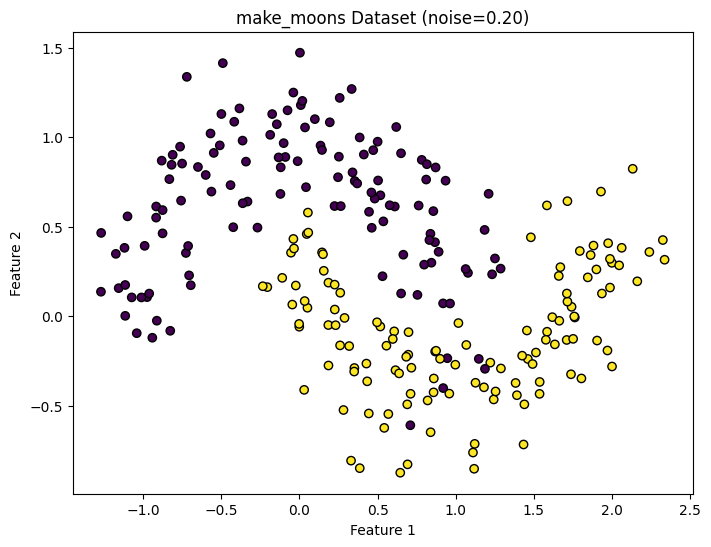

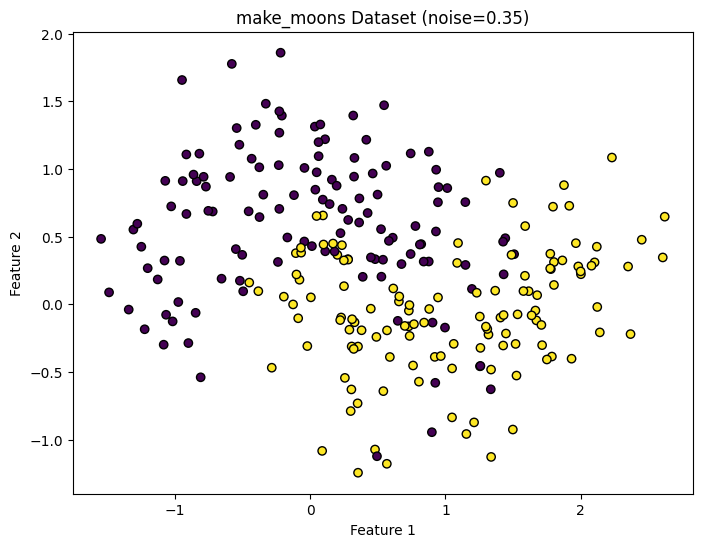

In [2]:
# Generate the first dataset with noise=0.20
X1, y1 = make_moons(n_samples=250, noise=0.20, random_state=51)

# Generate the second dataset with noise=0.35
X2, y2 = make_moons(n_samples=250, noise=0.35, random_state=51)

# Plot the first dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis', edgecolor='k')
plt.title("make_moons Dataset (noise=0.20)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig('dataset_1_noise_020.pdf', dpi=300)
plt.show()

# Plot the second dataset
plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis', edgecolor='k')
plt.title("make_moons Dataset (noise=0.35)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig('dataset_2_noise_035.pdf', dpi=300)
plt.show()

##2. Build a kNN classifier
Build a k nearest neighbor classifier for the noise=0.20 data set. Generate training and test
sets.

Knn 3 Accuracy: 0.92


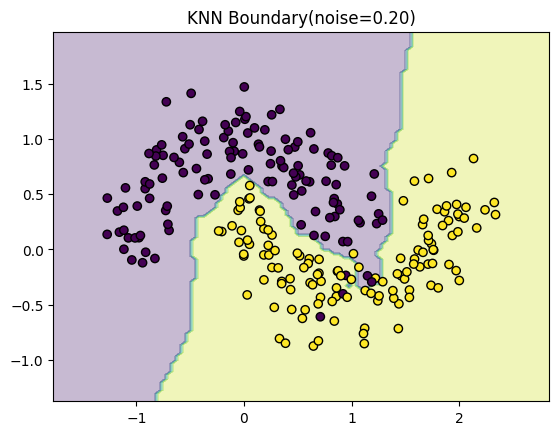

In [3]:
# Split into training (80%) and test sets (20%)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=509
)

# Create a knn classifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
# Train the classifier
knn.fit(X1_train, y1_train)
# Make predictions on the test set
y1_pred = knn.predict(X1_test)
# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Knn 3 Accuracy: {accuracy:.2f}")

DecisionBoundaryDisplay.from_estimator(
    knn, X1, cmap='viridis', alpha=0.3, eps=0.5, response_method="predict"
)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.title("KNN Boundary(noise=0.20)")
plt.savefig('knn_boundary_noise_020.pdf', dpi=300)
plt.show()

The model correctly classifies 92% of test samples, the selected value for k=3 made the model sensitive to local noise, which lead to misclassifications in overlapping regions.

##3. Experiment with noisy data set
Build a KNN classifier for the noise=0.35 data set. Generate training and test sets.
Compare your accuracy with that for the less noisy data set.

In [4]:
# splitting dataset with noise 0.35
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=509
)

Knn 3 Accuracy: 0.82


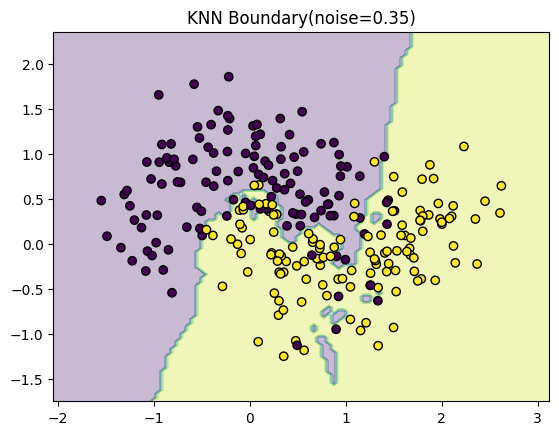

In [5]:
# Create a knn classifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
# Train the classifier
knn.fit(X2_train, y2_train)
# Make predictions on the test set
y2_pred = knn.predict(X2_test)
# Evaluate the model
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Knn 3 Accuracy: {accuracy:.2f}")

DecisionBoundaryDisplay.from_estimator(
    knn, X2, cmap='viridis', alpha=0.3, eps=0.5, response_method="predict"
)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k')
plt.title("KNN Boundary(noise=0.35)")
plt.savefig('knn_3_coundary_noise_0.35.pdf', dpi=300)
plt.show()

At noise=0.35, the two classes overlap significantly, creating regions where the true class labels are ambiguous. The kNN algorithm struggles with overlapping classes in high-noise settings

Knn 2 Accuracy: 0.80
Knn 3 Accuracy: 0.82
Knn 4 Accuracy: 0.80
Knn 5 Accuracy: 0.82
Knn 7 Accuracy: 0.82
Knn 10 Accuracy: 0.82


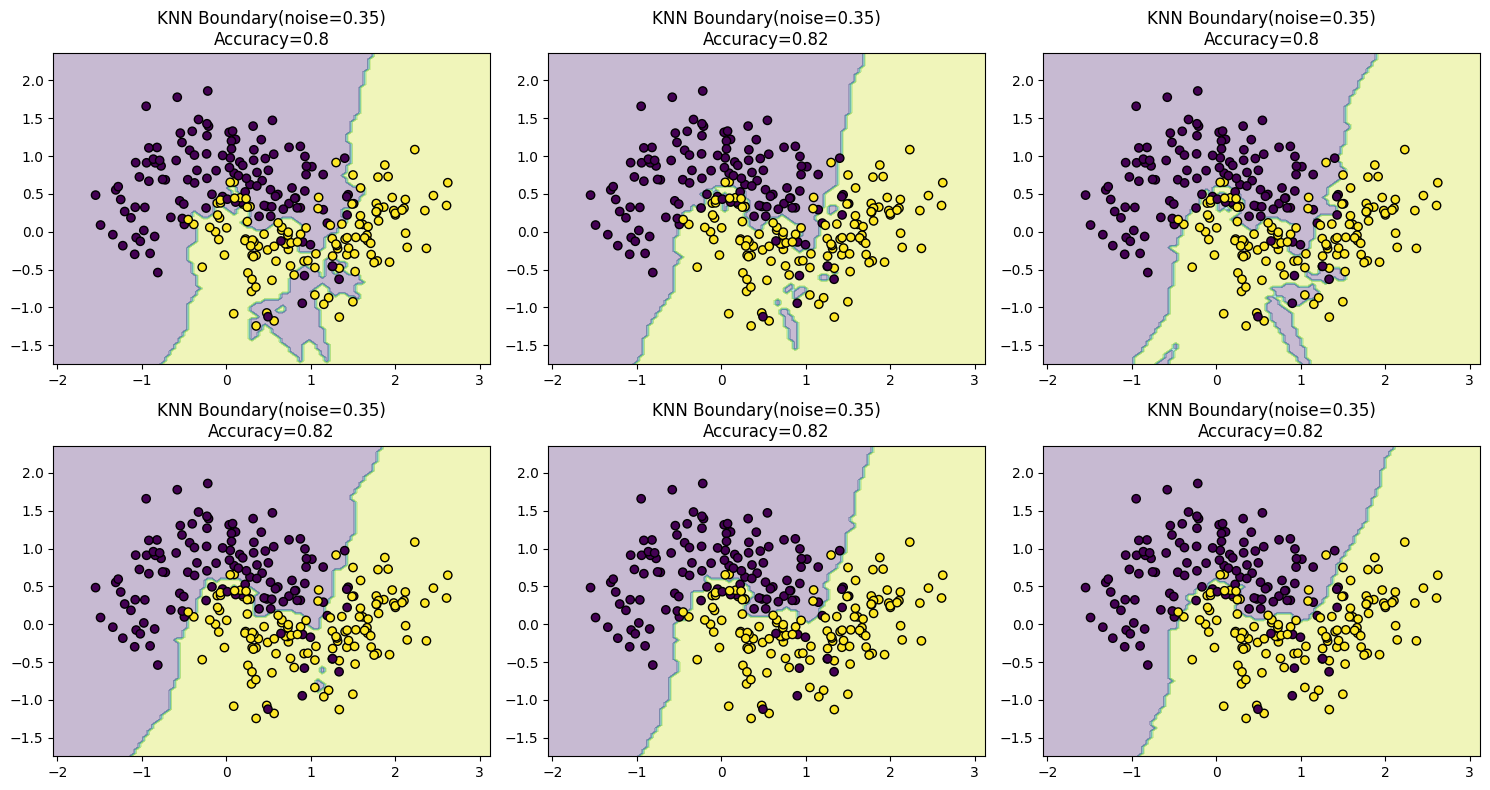

In [6]:
# Create a knn classifier
k_exp = [2,3,4,5,7,10]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for ax, k in zip(axes.ravel(), k_exp):
  knn = KNeighborsClassifier(n_neighbors=k)
  # Train the classifier
  knn.fit(X2_train, y2_train)
  # Make predictions on the test set
  y2_pred = knn.predict(X2_test)
  # Evaluate the model
  accuracy = accuracy_score(y2_test, y2_pred)
  print(f"Knn {k} Accuracy: {accuracy:.2f}")

  DecisionBoundaryDisplay.from_estimator(
      knn, X2, cmap='viridis', alpha=0.3, eps=0.5, response_method="predict",ax=ax
  )
  ax.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k')
  ax.set_title(f"KNN Boundary(noise=0.35)\nAccuracy={accuracy}")
plt.tight_layout()
plt.savefig('knn_boundary_noise_035_k_values.pdf', dpi=300)
plt.show()